In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import corner
from scipy import stats
from enterprise_extensions.model_utils import bayes_fac

In [2]:
# plt.rcParams['axes.labelsize'] = 14  # Set size for x and y axis labels
# # plt.rcParams['xtick.labelsize'] = 14  # Set size for x-tick labels
# # plt.rcParams['ytick.labelsize'] = 14  # Set size for y-tick labels
# plt.rcParams['axes.titlesize'] = 16  # Set size for title
# plt.rcParams['axes.titleweight'] = 'bold'  # Make title bold
# # plt.rc('font', family='Times New Roman')

In [3]:
# psrlist = ['J0023+0923_synthetic_injectedactual',]
psrlist = ['J0023+0923',]

In [4]:
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_14Feb_2025"
if psrlist[0][-1] in "45":
    chain_folder = "/lorule/scratch/jdt00012/chains_19Feb_2025"
chain_folder = "/lorule/scratch/jdt00012/Mar/chains_04Mar_2025"

# params = ['log_T', 'nu', 'phi_minus', 'phi_plus']
params = ['RN_gamma', 'RN_log10_A', 'log_T (s)', 'nu (1/day)', 'phi_minus', 'phi_plus']

PSR J0023+0923
Chain shape = (100001, 10)


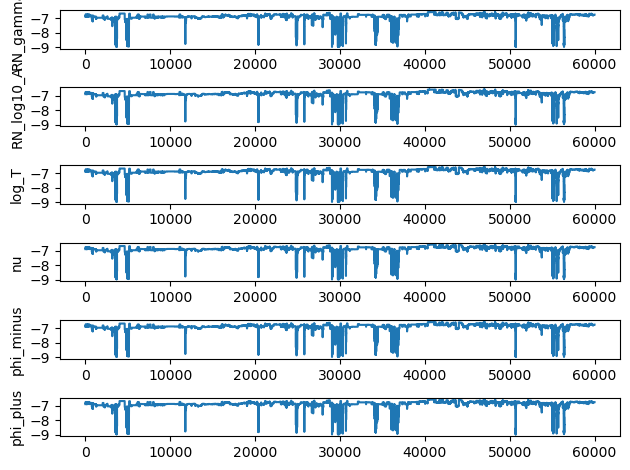

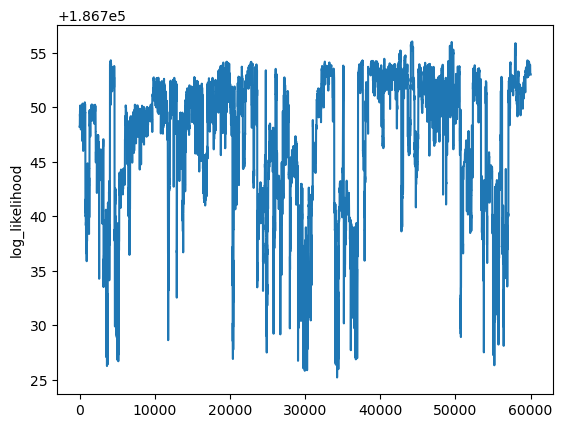

<Figure size 640x480 with 0 Axes>

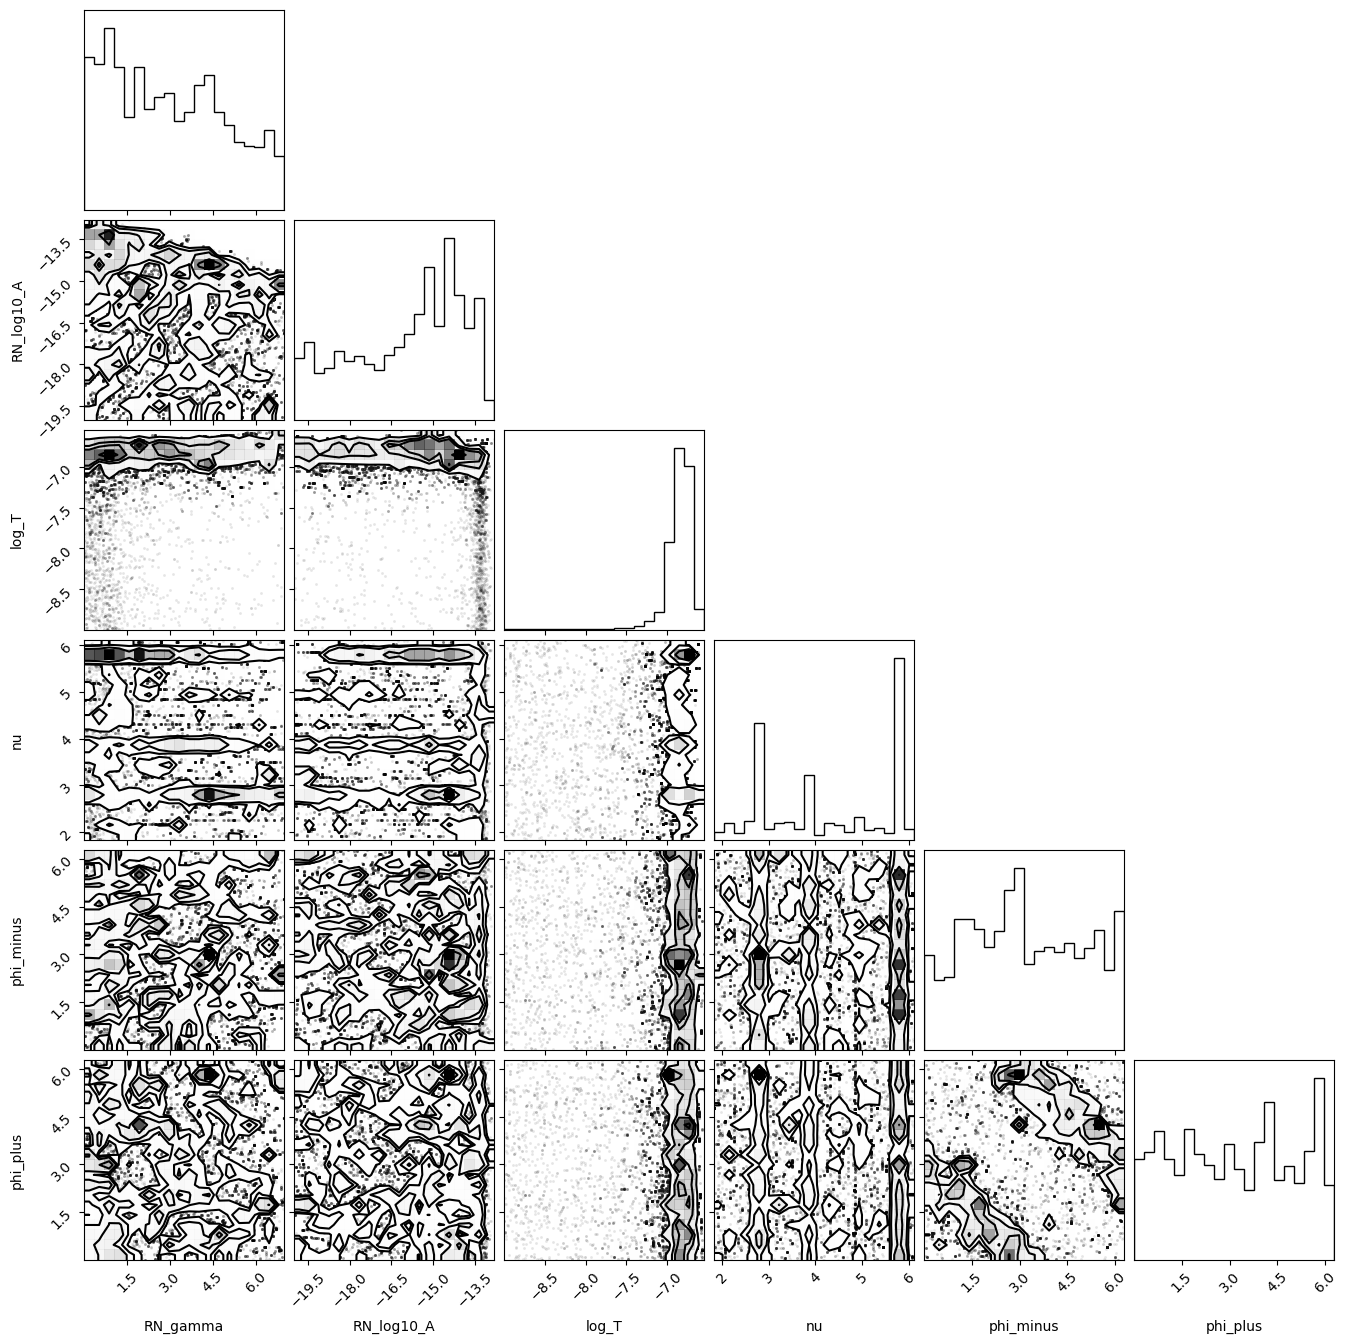

In [7]:
if psr is None or "J0023+0923" in psr:
    for psr in psrlist:
        chain_file = f"{chain_folder}/{psr}/chain_1.0.txt"
        # chain_file = f"{chain_folder}/{psr}/chain_1.5773502691896257.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
        chain[:,3] *= 86400 / (2*np.pi) # convert 2pi/s to 1/day
        chain[:,4] %= (2*np.pi)
        chain[:,5] %= (2*np.pi)
        ndim = len(params)
        percent_burn = 0.4
        burn = int(chain.shape[0] * percent_burn)
        fig, axs = plt.subplots(ndim, 1)
        for i, param in enumerate(params):
            ax = axs[i]
            ax.plot(chain[burn:, 2], ls='-', marker=None, alpha=1.0)
            ax.set_ylabel(param)
        fig.tight_layout()
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        T_strength = psr[-1]
        if T_strength == "l":
            T_strength = "0 (in other words, no signal by design)"
        else:
            T_strength = f"1e-{T_strength}"
        # corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        plt.suptitle(f"Posteriors for T = {T_strength} seconds INJECTED SIGNAL | J0023+0923")
        corner.corner(chain[burn:,:-4], labels=params,  plot_contours=True)
        plt.show()

In [11]:
logT_chain = chain[:,2]
bayes_fac(logT_chain, logAmin=-9, logAmax=-5)

(12.437935323383087, 0.0)

(array([1.90475214e-02, 1.96888521e-02, 1.65783983e-02, 1.85344569e-02,
        3.08159395e-02, 1.49782782e-01, 1.97507405e+00, 9.76842836e-01,
        0.00000000e+00, 3.20665344e-04]),
 array([-8.99850989, -8.68666141, -8.37481293, -8.06296445, -7.75111597,
        -7.43926749, -7.12741901, -6.81557053, -6.50372205, -6.19187357,
        -5.88002509]),
 <BarContainer object of 10 artists>)

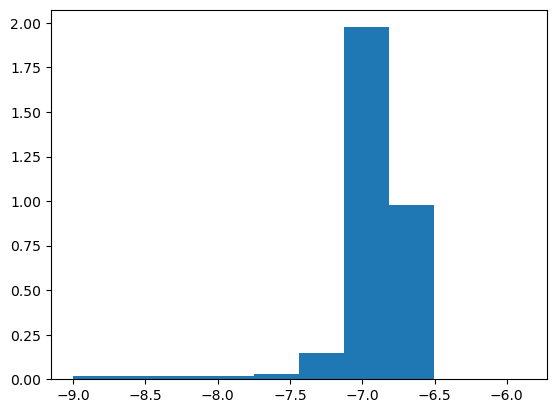

In [13]:
plt.hist(logT_chain, density=True)

In [79]:
nu_expected = 3.3343e-04
nu_day = 2*np.pi / 86164.0905
print(f"{nu_day=}\n")
for i in range(int(nu_expected // nu_day)):
    nu_harmonic = nu_expected - i*nu_day
    print(f"expected nu - {i}*nu_day = {nu_harmonic}")

nu_day=7.292115857915991e-05

expected nu - 0*nu_day = 0.00033343
expected nu - 1*nu_day = 0.00026050884142084013
expected nu - 2*nu_day = 0.0001875876828416802
expected nu - 3*nu_day = 0.00011466652426252028


In [9]:
3.3343e-04 * 86400 / (2*np.pi) # expected nu in units of 1/day

4.584991623131289

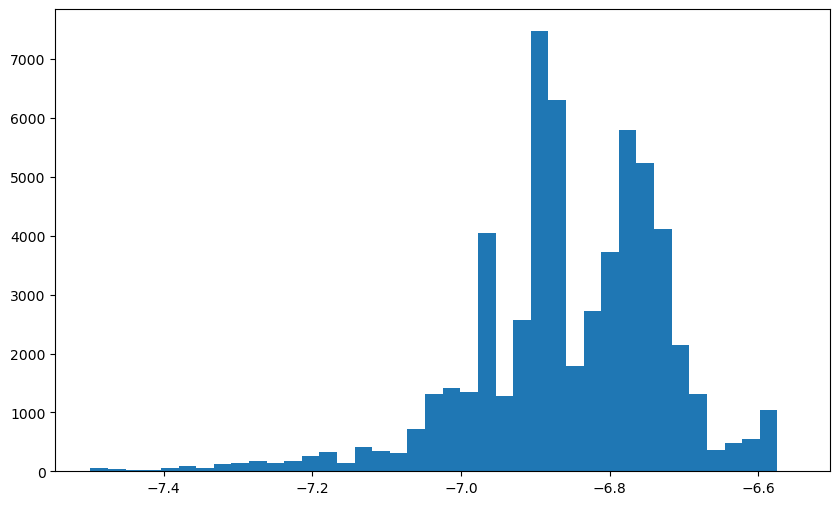

In [16]:
logT = chain[burn:, 0+2]
mask = logT > -7.5
logT = logT[mask]
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(logT, bins = 40)
plt.show()


PSR J0023+0923
Chain shape = (99900, 10)


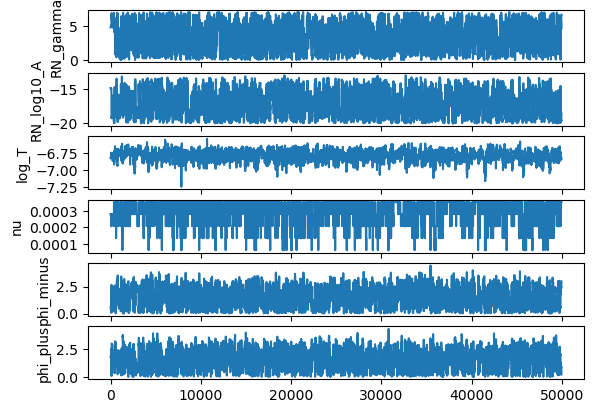

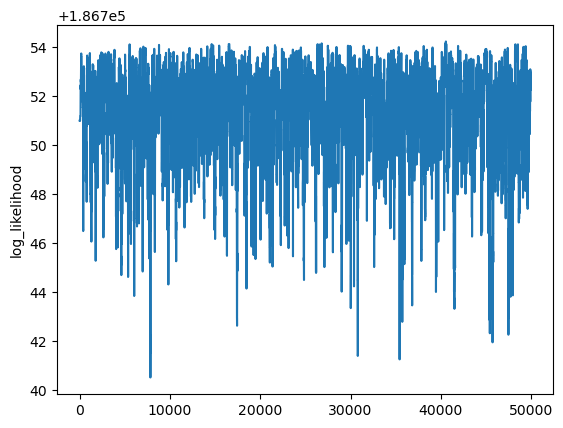

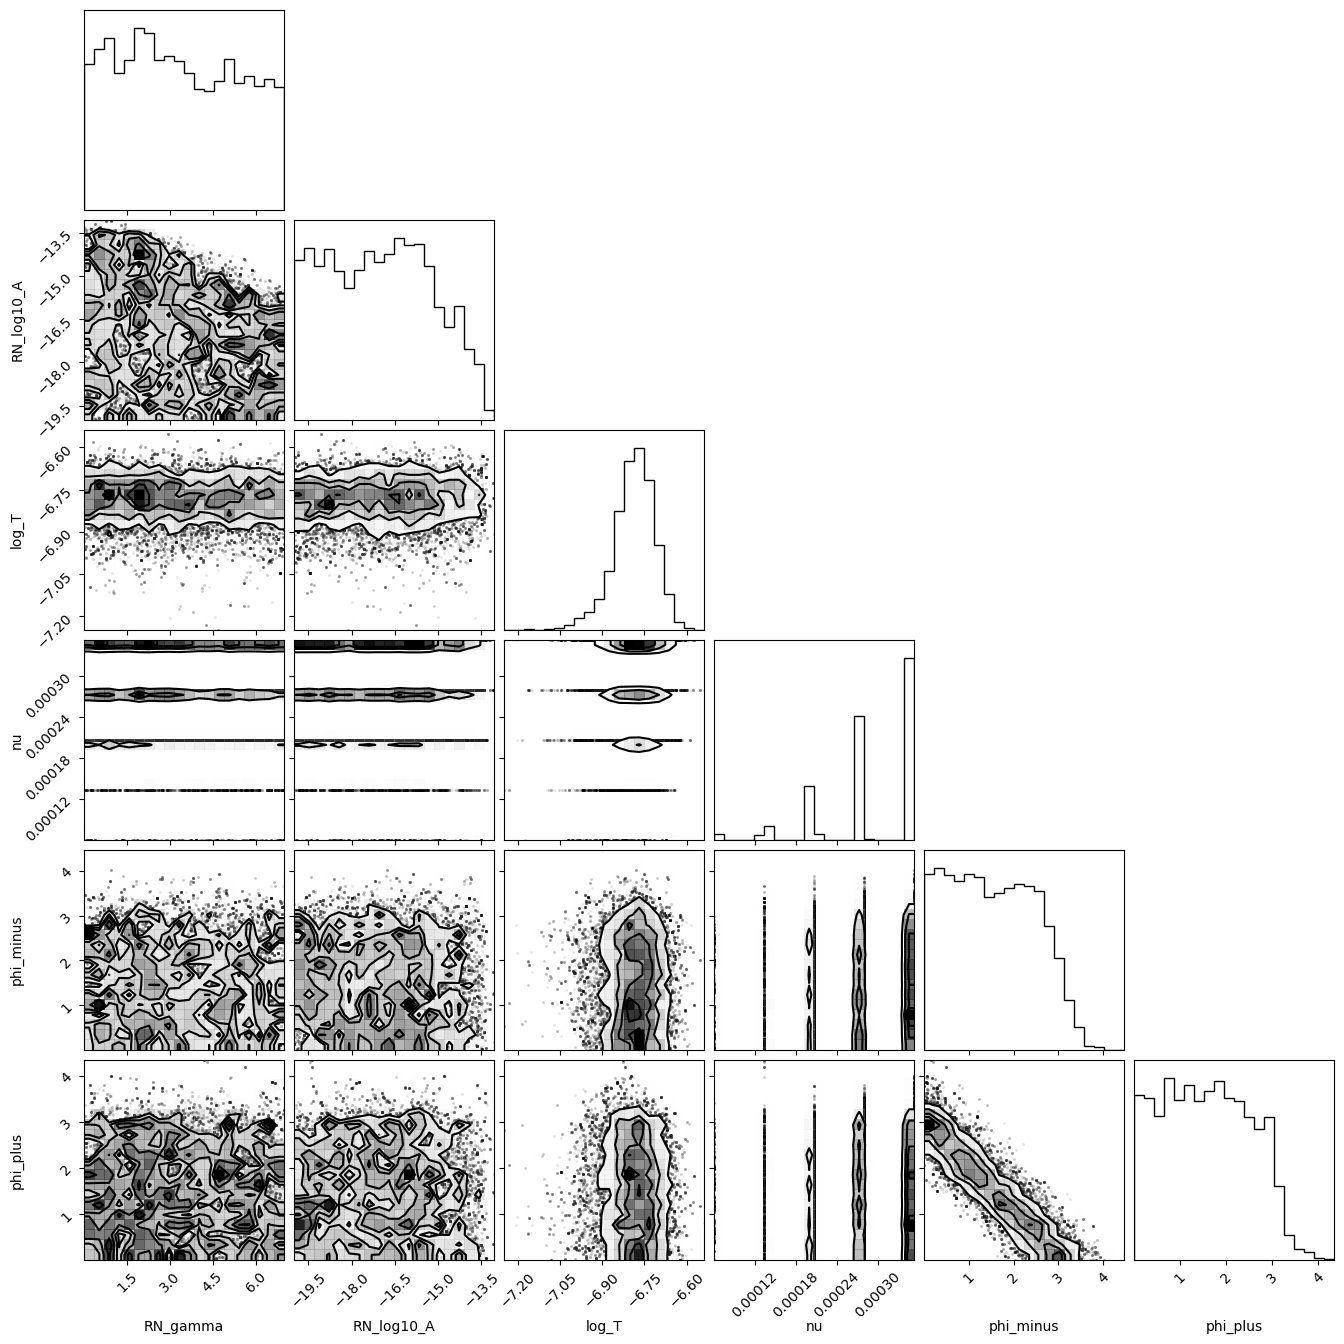

In [22]:
psrlist = ['J0023+0923',]
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_12Nov_2024"
if psr is None:
    for psr in psrlist:
        chain_file = f"{chain_folder}/{psr}/chain_1.txt"
        chain = np.genfromtxt(chain_file)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//2 # burn the first half if //2
        for i, param in enumerate(params):
            plt.subplot(ndim, 1, i + 1)
            plt.plot(chain[burn:, i], ls='-', marker=None, alpha=1.0)
            plt.ylabel(param)
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        corner.corner(chain[burn:,:-4], labels=params,  plot_contours=True)
        plt.show()

In [23]:
best_values_median = np.median(chain, axis=0)
print("Best values (median):", best_values_median)

Best values (median): [ 3.10571501e+00 -1.83248321e+01 -6.78237225e+00  2.79612836e-04
  2.36207396e+00  1.14022724e+00  1.86747926e+05  1.86749288e+05
  3.81300000e-02  1.00000000e+00]


In [24]:
best_values_map = []
for i in range(chain.shape[1]):
    hist, bin_edges = np.histogram(chain[:, i], bins=50, density=True)
    max_bin = np.argmax(hist)
    best_values_map.append(0.5 * (bin_edges[max_bin] + bin_edges[max_bin + 1]))

print("Best values (MAP):", best_values_map)

Best values (MAP): [3.1499760344938643, -19.23548772799338, -6.7765099063016, 0.0003563770072213599, 4.9515976412360505, 1.1725836775792258, 186687.51476155999, 186688.87649956, 0.03292883, 1.01]


In [29]:
B_med = np.median(chain[:,2])
print(B_med)

chain_ij = np.where(chain == B_med)
chain_i = chain_ij[0][0]
chain_j = chain_ij[1][0]
chain[chain_i, chain_j]


-6.7823722481364


-6.7823722481364

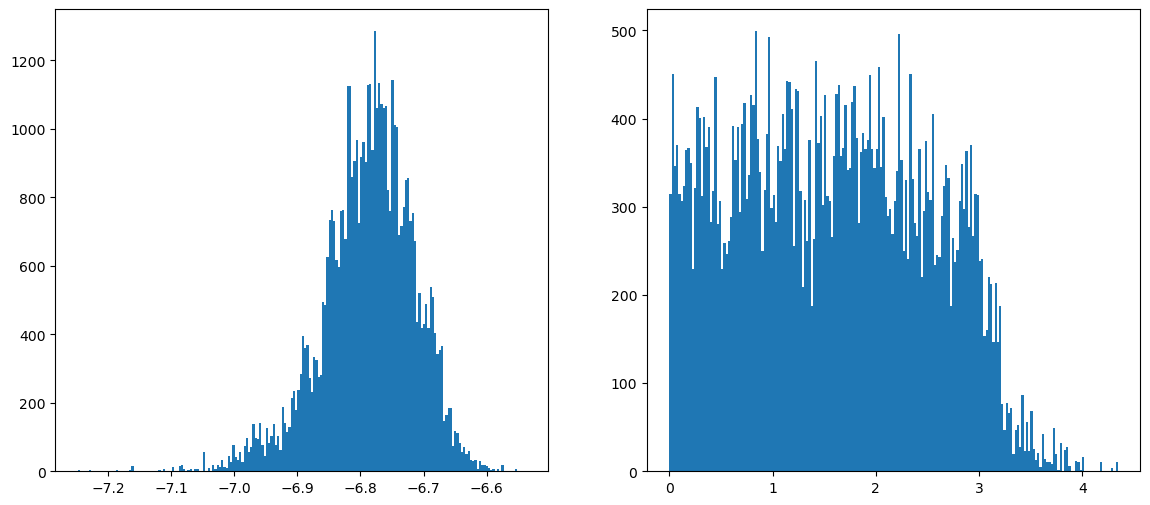

In [10]:
log_B_chain = chain[burn:, 2]
phi_plus_chain = chain[burn:, 5]
nbins = 200

fig, axs = plt.subplots(1,2, figsize = (14, 6))
axs[0].hist(log_B_chain, bins = nbins)
axs[1].hist(phi_plus_chain, bins = nbins)
plt.show()

0.8344633387483447


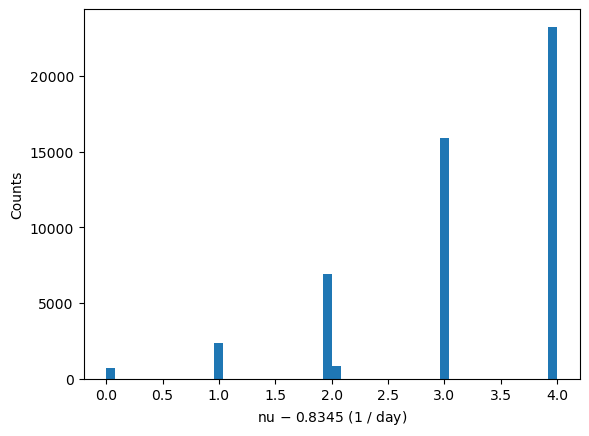

In [11]:
nu_day = 2*np.pi / 86164.0905
# nu_day = 2*np.pi / 86400
# nu_day = 1
nu_chain = chain[burn:, 3] / nu_day
mask = nu_chain < 1
mode_result = stats.mode(nu_chain[mask])
nu_mode = mode_result.mode
print(f"{nu_mode}")
nbins = 50
fig, ax = plt.subplots()
ax.hist(nu_chain - nu_mode, bins = nbins)
ax.set_xlabel(f"nu $-$ {round(nu_mode, 4)} (1 / day)")
ax.set_ylabel(f"Counts")
plt.show()

0.0002 0.00022
log_B_avg_0 = -6.794161097064721
nu_mode=0.0002066909356550525


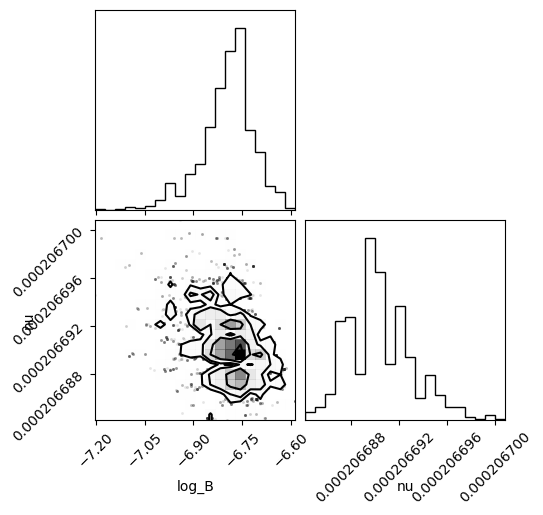

0.00025 0.0003
log_B_avg_1 = -6.788698725793816
nu_mode=0.00027960912955076475


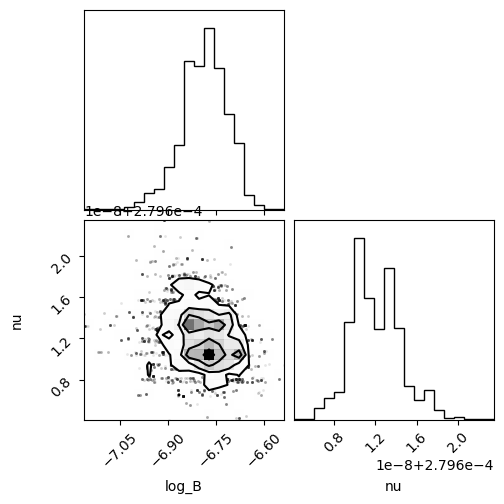

0.00033 0.0004
log_B_avg_2 = -6.781046286632891
nu_mode=0.0003525302919247412


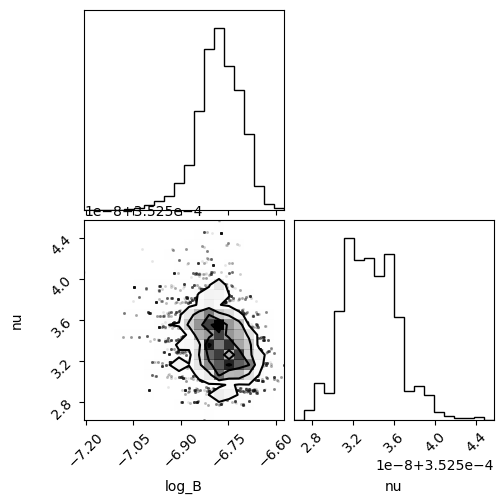

In [12]:
nu_modes = []
i = -1
for nu_min, nu_max in [(0.00020, 0.00022), (0.00025, 0.00030), (0.00033, 0.00040)]:
    i+=1
    nu_chain = chain[burn:, 3]
    log_B_chain = chain[burn:, 2]
    mask = np.logical_and(nu_chain > nu_min, nu_chain < nu_max)
    log_B_chain = log_B_chain[mask]
    nu_chain = nu_chain[mask]
    corner.corner(chain[burn:,2:4][mask], labels=["log_B", "nu"],  plot_contours=True)
    print(nu_min, nu_max)
    print(f"log_B_avg_{i} = {np.average(log_B_chain)}")
    
    mode_result = stats.mode(nu_chain)
    nu_mode = mode_result.mode
    print(f"{nu_mode=}")
    nu_modes.append(nu_mode)
    
    plt.show()

In [13]:
nu_modes = np.array([0.000206, 0.00028, 0.000350])
print(f"{nu_modes=}")


nu_modes=array([0.000206, 0.00028 , 0.00035 ])


In [14]:
nu0 = nu_modes[0]
nu1 = nu_modes[1]
nu2 = nu_modes[2]

print(f"{nu2 - nu1=}")
print(f"{(nu1 - nu0)=}")
print(f"{nu_modes / (nu2 - nu1)=}")

nu2 - nu1=7.000000000000002e-05
(nu1 - nu0)=7.399999999999998e-05
nu_modes / (nu2 - nu1)=array([2.94285714, 4.        , 5.        ])


####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J0023+0923
Chain shape = (100001, 10)


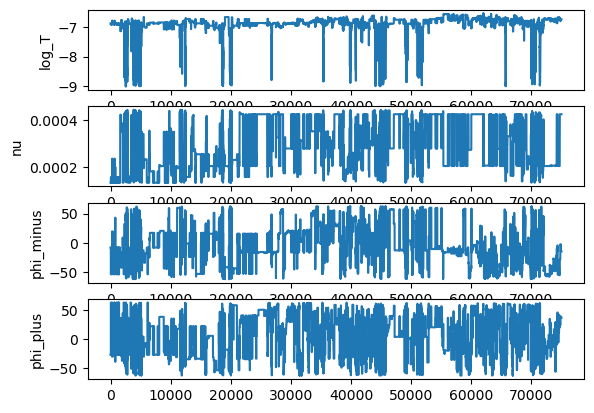

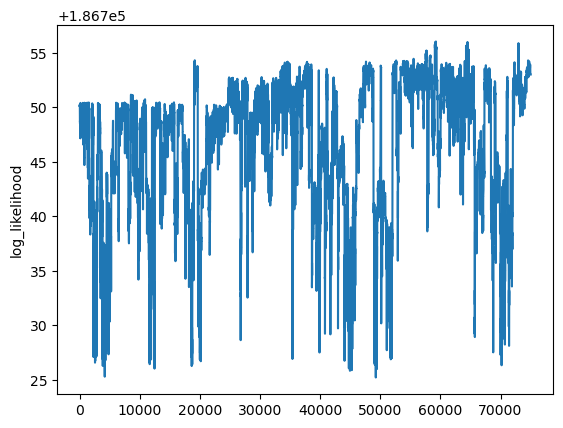

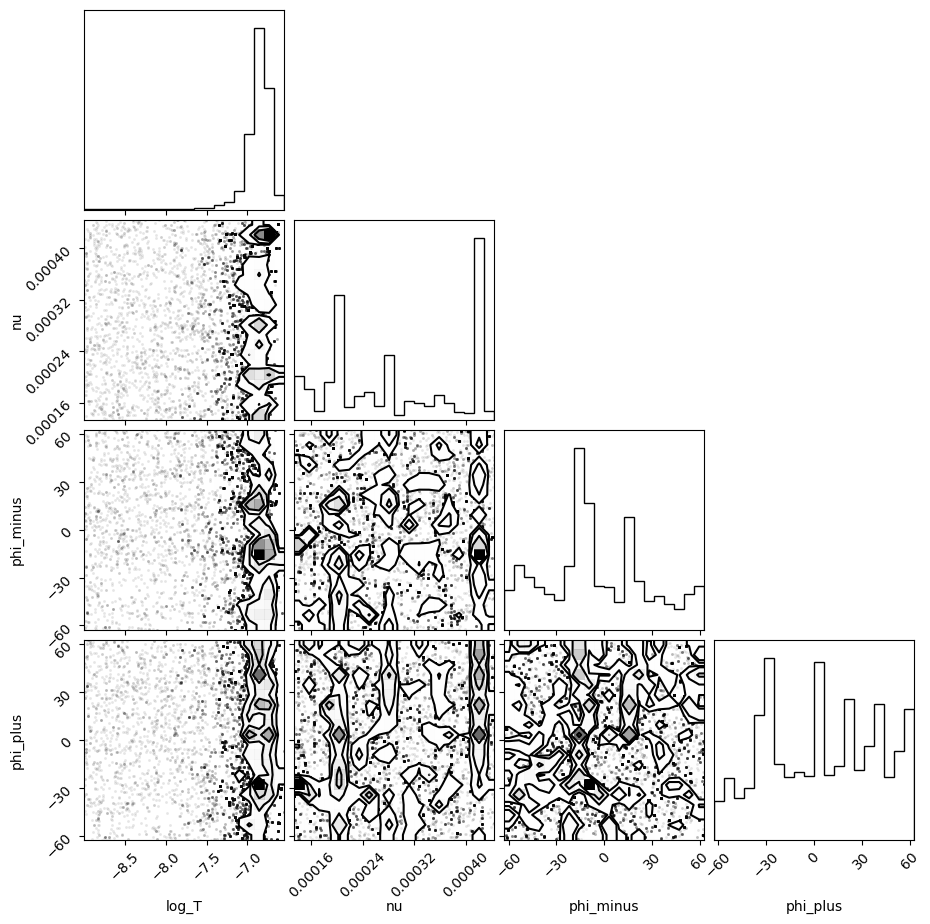

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J0610-2100
Chain shape = (100001, 10)


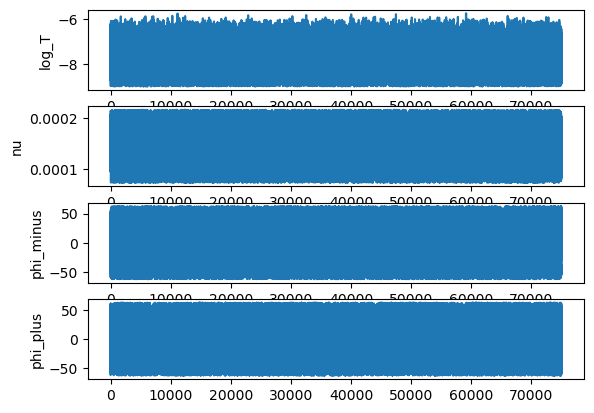

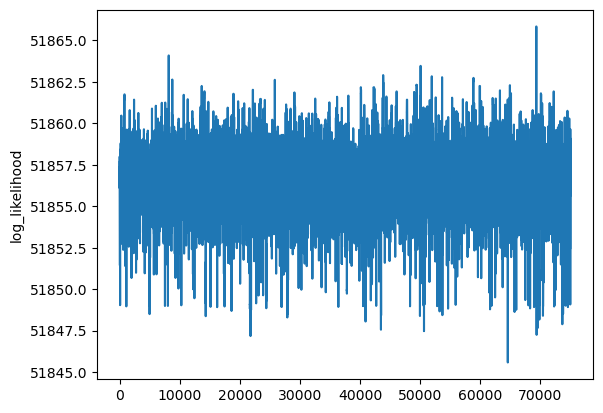

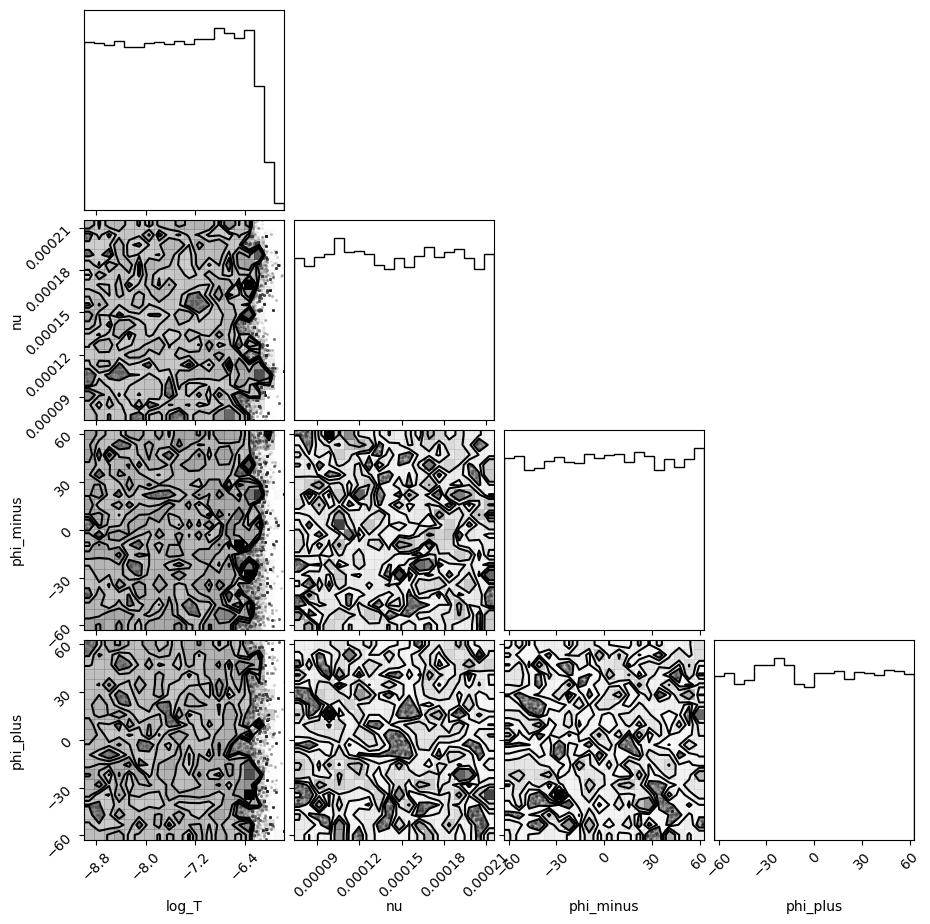

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J0636+5128
Chain shape = (100001, 10)


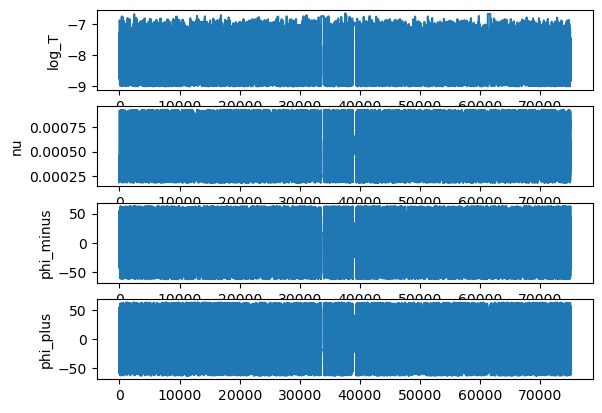

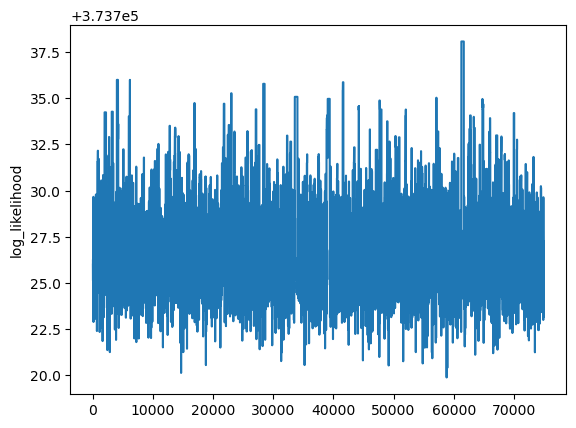

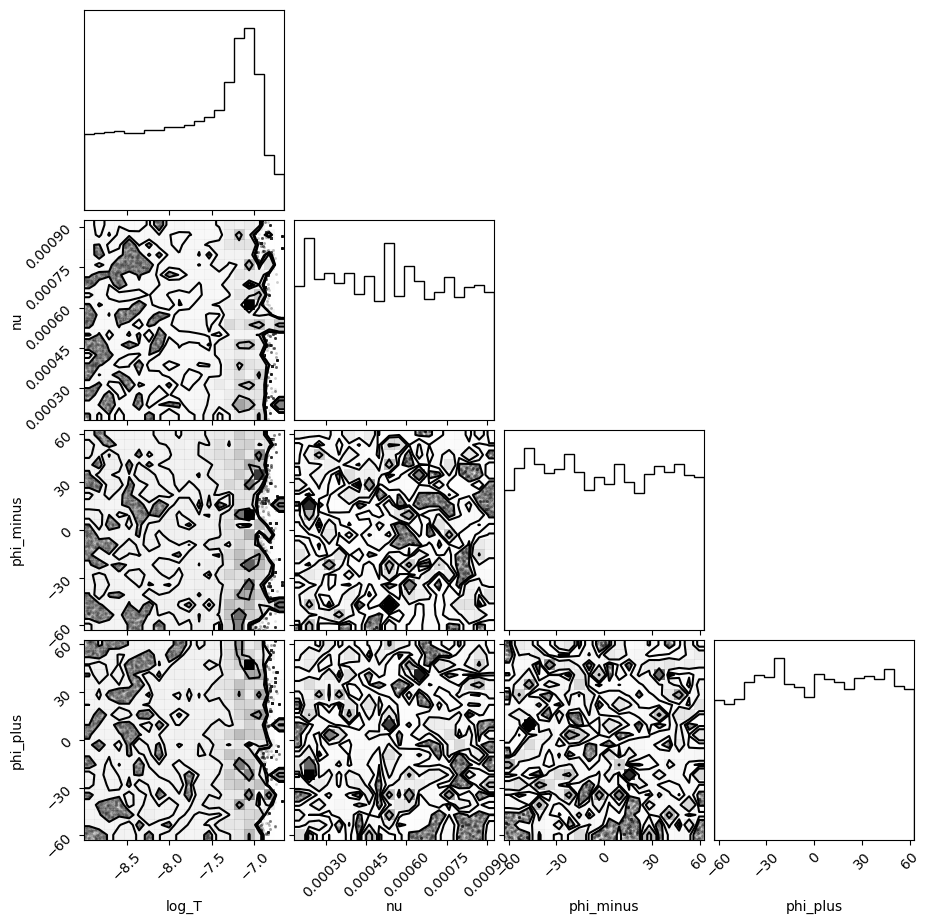

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J1719-1438
Chain shape = (100001, 10)


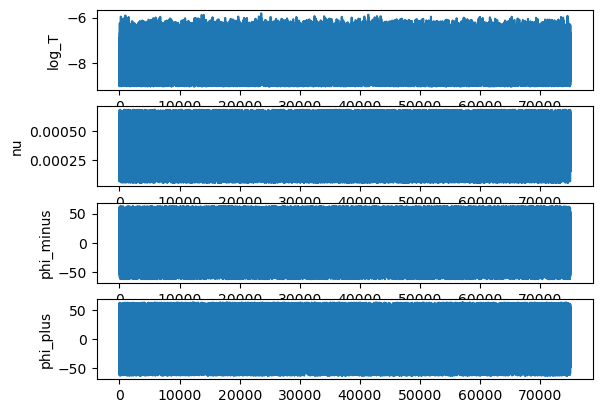

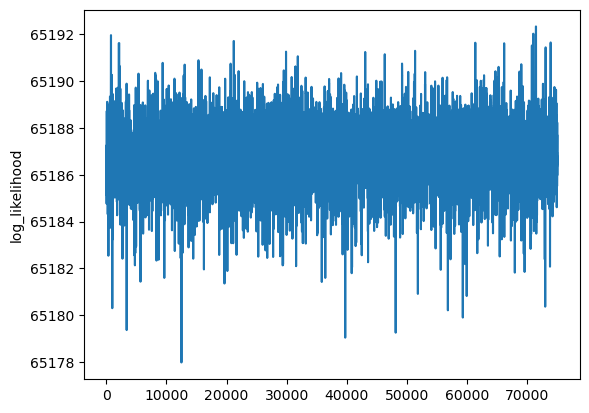

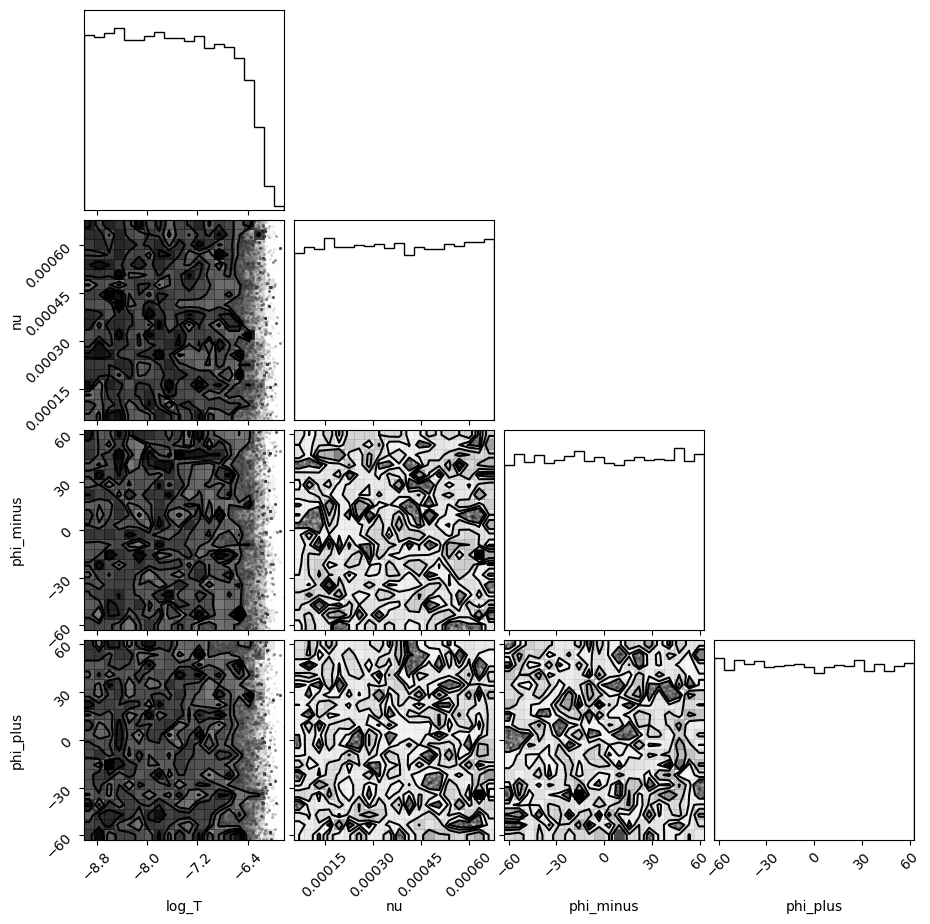

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J1745+1017
Chain shape = (100001, 10)


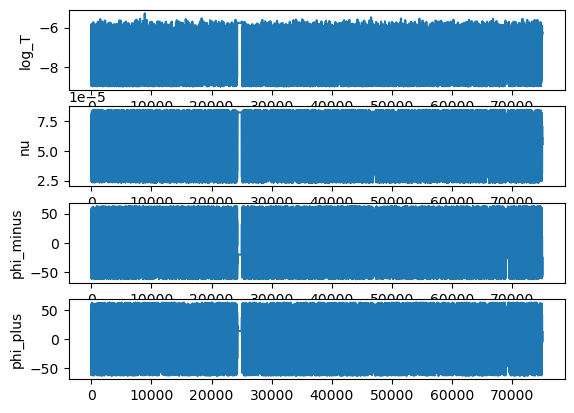

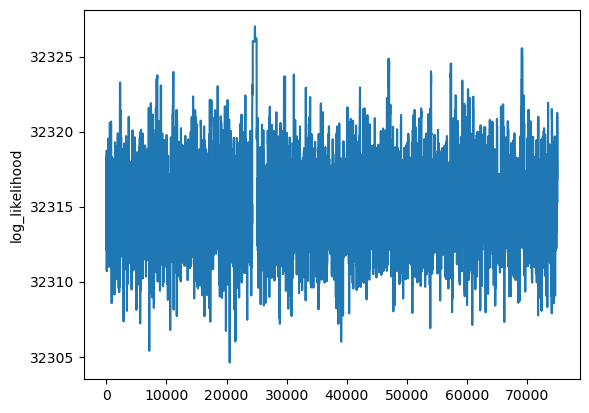

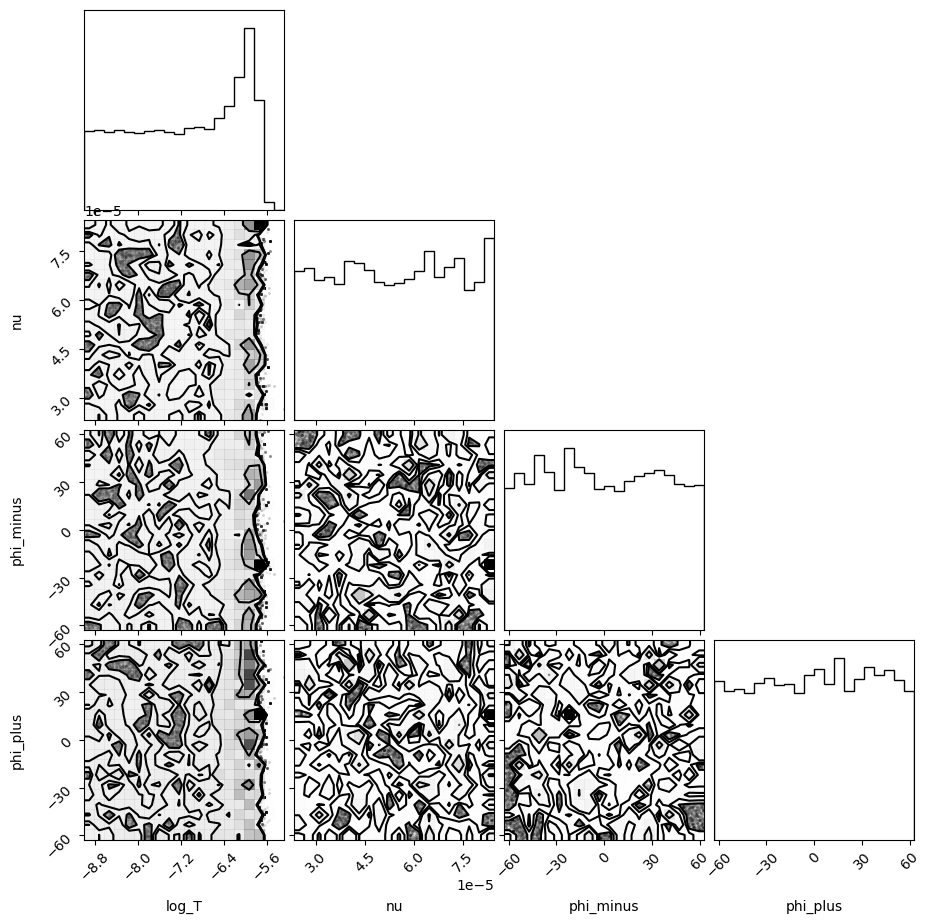

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J2214+3000
Chain shape = (100001, 10)


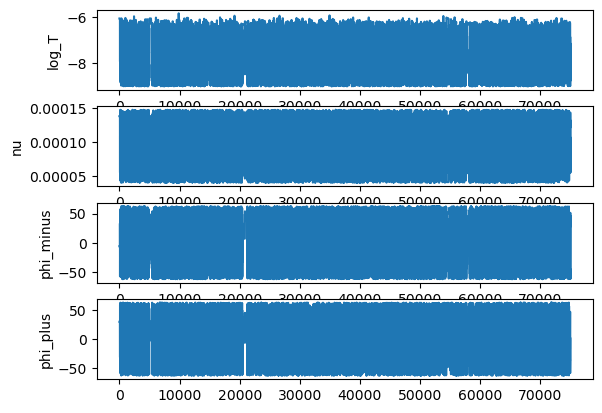

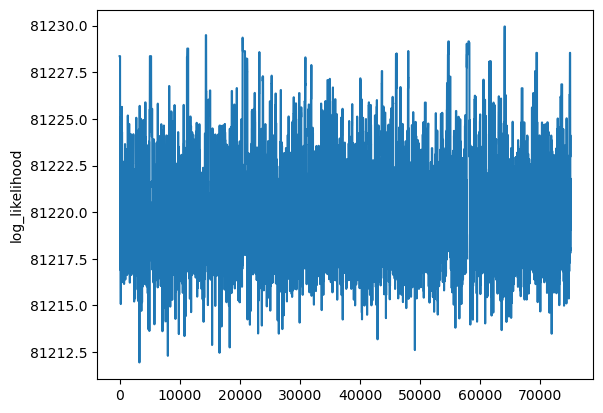

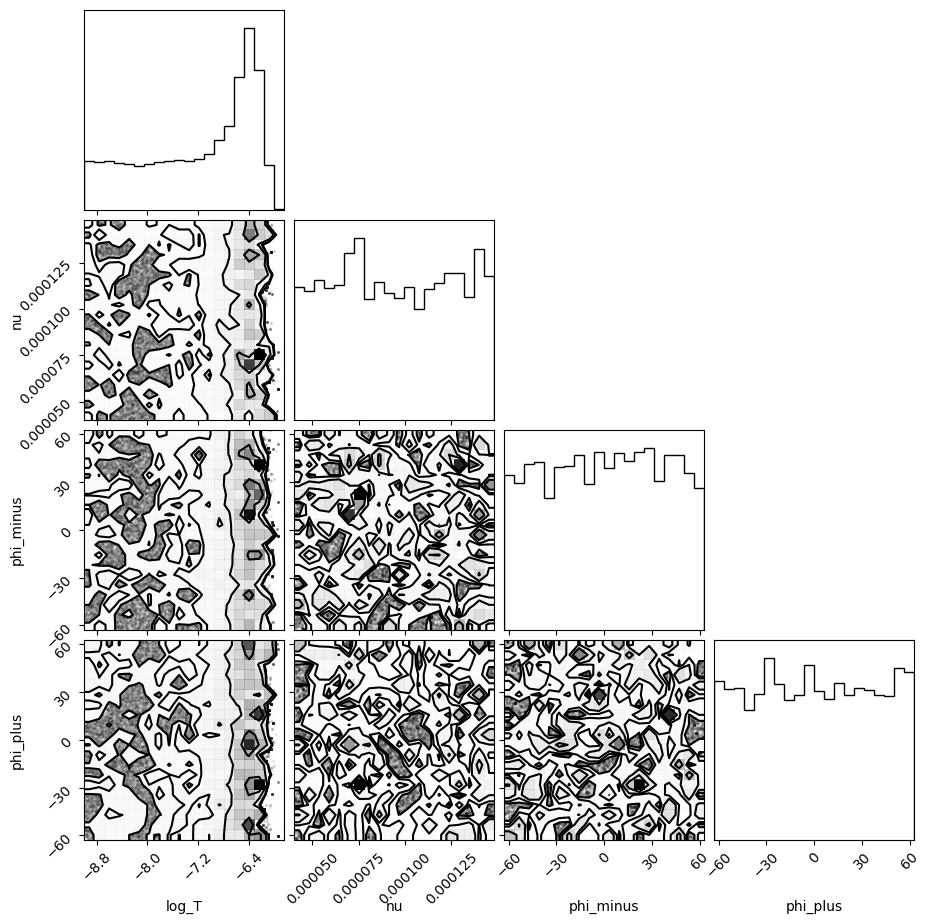

####################################################################################################
####################################################################################################
####################################################################################################
####################################################################################################

PSR J2234+0944
Chain shape = (100001, 10)


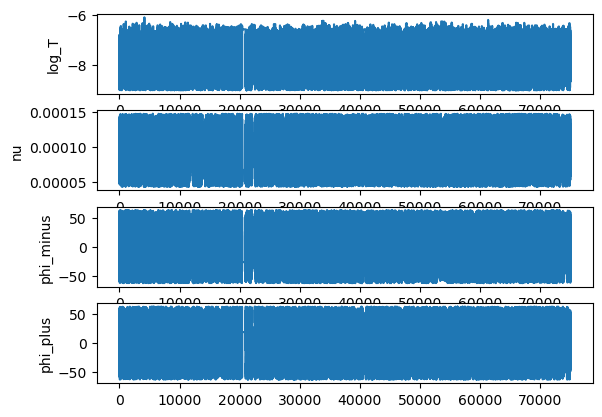

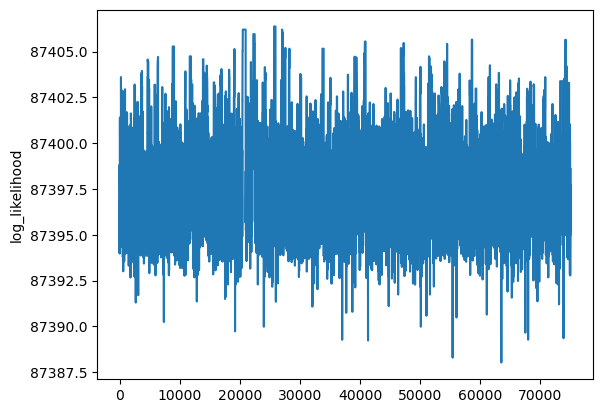

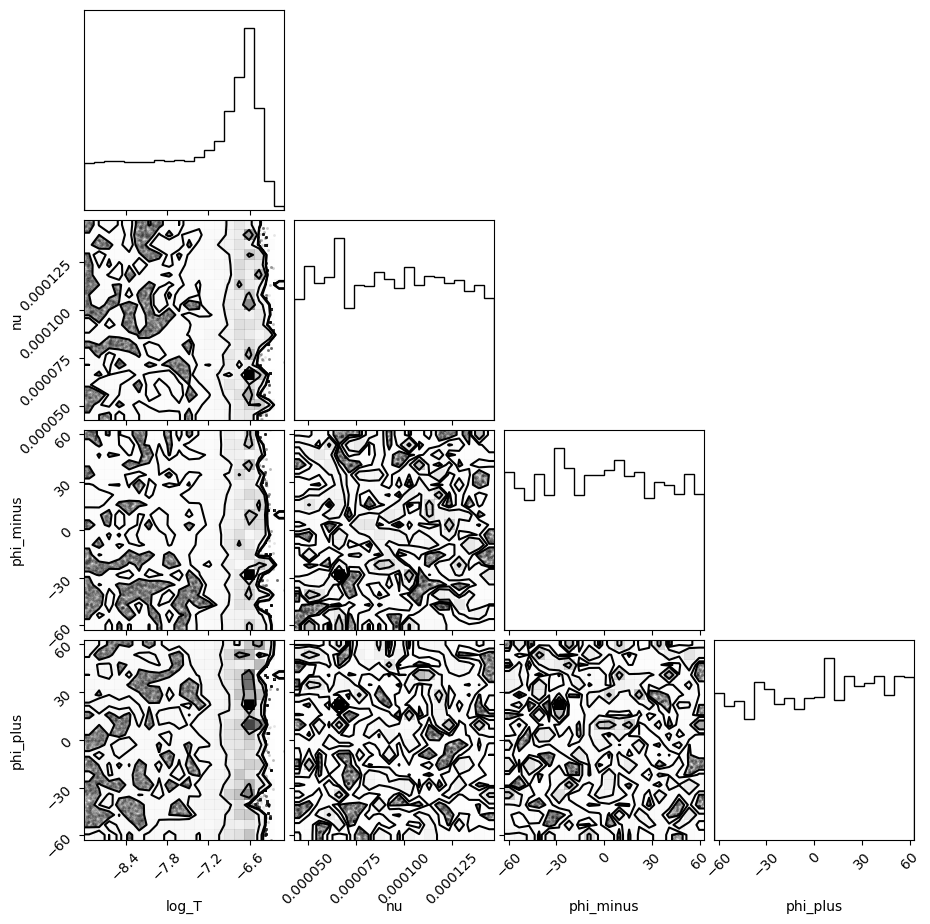

In [19]:
psrlist = ['J0023+0923','J0610-2100', 'J0636+5128', 'J1719-1438', 'J1745+1017','J2214+3000', 'J2234+0944']
all_chains = {}
psr = None
chain_folder = "/lorule/scratch/jdt00012/chains_04Mar_2025"
if psr is None:
    for psr in psrlist:
        chain_file = f"{chain_folder}/{psr}/chain_1.0.txt"
        chain = np.genfromtxt(chain_file)
        all_chains[psr] = chain
        print(("#"*100 + "\n")*4)
        print(f"PSR {psr}")
        print(f"Chain shape = {chain.shape}")
       
        ndim = len(params)
        burn = chain.shape[0]//4
        for i, param in enumerate(params):
            plt.subplot(ndim, 1, i + 1)
            plt.plot(chain[burn:, i+2], ls='-', marker=None, alpha=1.0)
            plt.ylabel(param)
        plt.show()

        plt.plot(chain[burn:, -3])
        plt.ylabel('log_likelihood')
        plt.show()

        corner.corner(chain[burn:,2:-4], labels=params,  plot_contours=True)
        plt.show()